In [1]:



library(dplyr)

aa<-read.csv("/home/agranado/Downloads/flyData_filtered_clustered_jupyter_15Nov_ALL_Cells.txt")

aa <- aa %>% filter(clone_id>0 & clust_label >=0)
n_clones= length(unique(aa$clone_id))



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:

all_dists = list()
all_dists_umap = list()
array_dist = c()
array_umap_dist = c()

for(i in 1:n_clones){
  
  aa %>% filter(clone_id ==i) ->this_clone 
  
  this_clone %>% select(ypos,xpos) %>% dist() -> all_dists[[i]]
  this_clone %>% select(umap_1,umap_2) %>% dist() -> all_dists_umap[[i]] 
  
  array_dist = c(array_dist,as.matrix(all_dists[[i]])[all_dists[[i]] %>% as.matrix() %>% lower.tri()])
  array_umap_dist = c(array_umap_dist,as.matrix(all_dists_umap[[i]])[all_dists_umap[[i]] %>% as.matrix() %>% lower.tri()])
  
  }



In [3]:
length(array_umap_dist)

[1] 9958

In [4]:
length(array_dist)

[1] 9958

In [5]:
dim(aa)

[1] 525  19

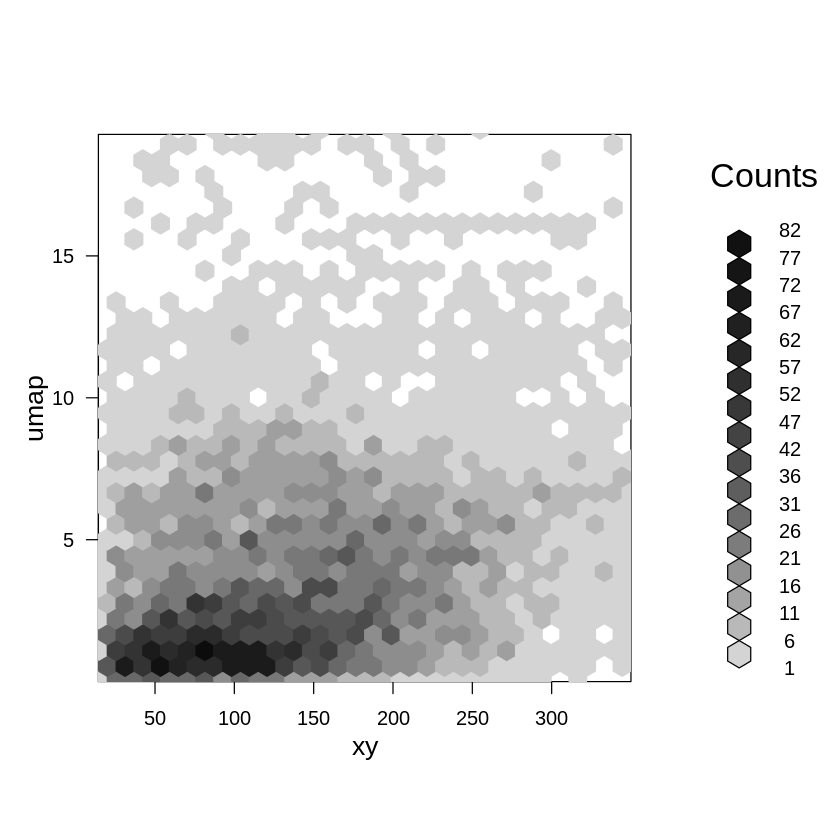

In [6]:
library(hexbin)

df_dist = data.frame(xy = array_dist,umap = array_umap_dist)
h<-hexbin(df_dist %>% filter(xy<350))
plot(h)